In [39]:
#importing modules and datasets for building model and for analysis.
from keras.datasets import imdb
from keras import Model
from keras import layers, preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# defining model for natural language processing...
max_features=10000; maxlen=20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)  # the following lines specifies the data
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)  #
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

nlp_model= models.Sequential()
nlp_model.add(layers.Embedding(10000, 8, input_length=maxlen))
nlp_model.add(layers.Flatten())
nlp_model.add(layers.Dense(1, activation='sigmoid'))
nlp_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
nlp_model.summary()

history=nlp_model.fit(x_train, y_train,
        epochs=10, batch_size=32, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.6759 - acc: 0.6045 - val_loss: 0.6398 - val_acc: 0.6808
Epoch 2/10
20000/20000 [==============================] - 1s 42us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 40us/step - loss: 

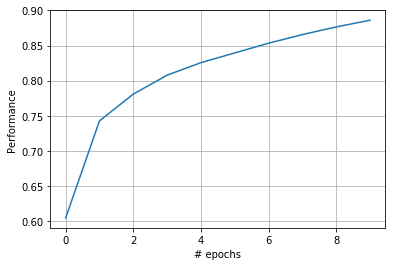

In [42]:
plt.plot(history.history['acc'])
plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('Performance')
plt.show()